In [1]:
# load data
# pdb file from: http://www.rcsb.org/pdb/explore/explore.do?pdbId=1l2y

import pytraj as pt

traj = pt.iterload('1L2Y.pdb', top='1L2Y.pdb')
traj

<pytraj.TrajectoryIterator, 38 frames, include:
<Topology: 304 atoms, 20 residues, 1 mols, non-PBC>>
           

In [2]:
# search hbonds for all residues
# dump data to `dataset` (similiar to python'list and dict)
dataset = pt.search_hbonds(traj, dtype='dataset')
print(dataset)
# 0: no hbond
# 1: there is hbond

<pytraj.DatasetList with 32 datasets>
total_solute_hbonds
[6 7 8 ..., 7 6 6]

ASN1_O-GLN5_N-H
[1 0 0 ..., 0 0 0]

ARG16_O-TRP6_NE1-HE1
[1 1 1 ..., 1 1 1]
...

ASP9_OD2-SER14_OG-HG
[0 0 0 ..., 0 0 0]

ASP9_OD2-ARG16_NH1-HH11
[0 0 0 ..., 0 0 0]


In [3]:
# get total solute hbonds
print(dataset['total_solute_hbonds'])

<pytraj.array.DataArray: size=38, key=total_solute_hbonds, dtype=int32, ndim=1> 
values:
[6 7 8 ..., 7 6 6]


In [8]:
# take data for specific hbond
print(dataset['ARG16_O-TRP6_NE1-HE1'])

<pytraj.array.DataArray: size=38, key=ARG16_O-TRP6_NE1-HE1, dtype=int32, ndim=1> 
values:
[1 1 1 ..., 1 1 1]


In [11]:
# take hbond for only ASP9
glu5 = dataset.filter(lambda x: 'ASP9' in x.key)
print(glu5.keys())

['ASP9_O-SER14_OG-HG', 'ASP9_OD2-ARG16_NH1-HH12', 'ASP9_OD2-ARG16_NH2-HH22', 'ASP9_OD2-ARG16_NE-HE', 'ASP9_OD1-LYS8_NZ-HZ1', 'ASP9_OD2-ARG16_NH2-HH21', 'ASP9_OD1-SER14_OG-HG', 'GLN5_O-ASP9_N-H', 'ASP9_OD2-SER14_OG-HG', 'ASP9_OD2-ARG16_NH1-HH11']


In [18]:
glu5_val = glu5.values
print(glu5_val)

print('total hbonds for GLU5 per frame')
import numpy as np
glu5_total = np.sum(glu5_val, axis=0)
print(glu5_total)

[[1 1 1 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
total hbonds for GLU5 per frame
[1 3 1 ..., 0 0 0]


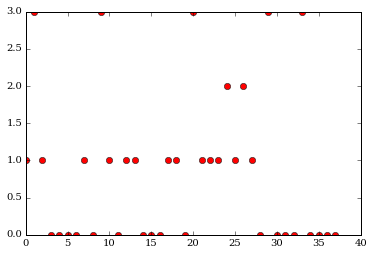

In [21]:
# plot
%matplotlib inline

from matplotlib import pyplot as plt
plt.plot(glu5_total, 'ro')

In [22]:
# get usage
help(pt.search_hbonds)

Help on function search_hbonds in module pytraj.hbonds:

search_hbonds(traj, mask='', dtype='dataset', solventdonor=None, solventacceptor=None, update_legend=True, *args, **kwd)
    search hbonds for a given mask
    
    Parameters
    ----------
    traj : {Trajectory-like, list of frames, list of Trajectory-like}
    mask : str 
        Amber atom mask
    dtype : str {'list', 'pyarray', 'dataset', 'ndarray'}, default='dataset'
    *args, **kwd: optional
    
    Returns
    -------
    out : pytraj.DatasetList
    
    Examples
    --------
    >>> import pytraj as pt
    >>> pt.search_hbonds(traj)
    >>> pt.search_hbonds(traj, solventdonor=':WAT@O', solventacceptor=':WAT')

